In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# import results
df = pd.read_csv('logs/196.csv')
print(df.shape)

(200000, 2)


In [3]:
# set temp schedule to match generated results
startingTemp = 50000
finalTemp = 0.1
Tfactor = -math.log(startingTemp / finalTemp)
steps = df.shape[0]
schedule = [startingTemp * math.exp(Tfactor * step / steps) for step in range(0,steps)]

In [4]:
%matplotlib inline

In [5]:
max(df['energy'])

79.264200176999992

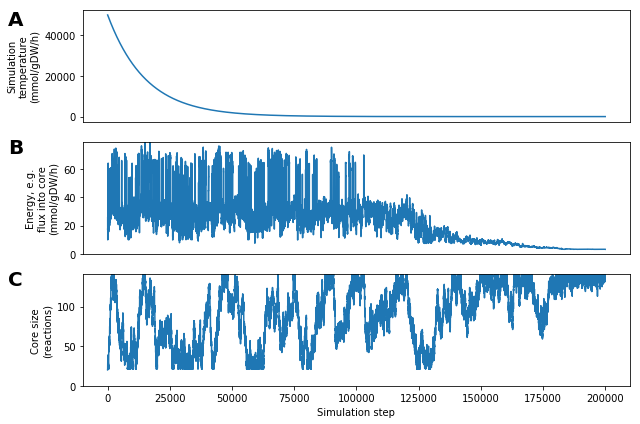

In [6]:
# plot the data
plt.figure(1, figsize=(6*1.5,6))
plt.subplot(311)
plt.plot(schedule)
plt.text(-40000, 0.9*max(schedule), 'A', size=20, weight='bold')
plt.ylabel('Simulation\ntemperature\n(mmol/gDW/h)')
plt.subplot(311).axes.get_xaxis().set_visible(False)
plt.subplot(312)
plt.plot(df['energy'])
plt.text(-40000, 0.9*max(df['energy']), 'B', size=20, weight='bold')
plt.ylabel('Energy, e.g.\nflux into core\n(mmol/gDW/h)')
plt.ylim([0,max(df['energy'])])
plt.subplot(312).axes.get_xaxis().set_visible(False)
plt.subplot(313)
plt.text(-40000, 0.9*max(df['size']), 'C', size=20, weight='bold')
plt.plot(df['size'])
plt.ylim([0,max(df['size'])])
plt.ylabel('Core size\n(reactions)')
plt.xlabel('Simulation step')
plt.tight_layout()
plt.savefig("fig4.pdf")